In [274]:
## Importing libraries ##
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s
import re as re

#### Import the data and get a high-level picture

In [275]:
## Importing and showing data  ##
df = pd.read_csv('sales(1).csv')
df.tail()

,order_id,name,ordered_at,price,quantity,line_total
29917,18452,"""ICE CREAM"" Dulce De Leche",2018-06-26 03:56:13,$-1.50,2,$-3.00
29918,12889,"""ICE CREAM"" Dark Chocolate",2018-03-03 10:06:21,$4.00,3,$12.00
29919,14526,"""ICE CREAM"" Peanut Fudge",2018-04-05 17:33:24,$3.50,3,$10.50
29920,19589,"""CONE"" Dipped Waffle Cone",2018-07-20 09:10:01,$3.50,2,$7.00
29921,19270,"""ICE CREAM"" Earl Gray",2018-07-13 09:20:21,$0.50,2,$1.00


In [276]:
## Showing dataset shape ##
df.shape

(29922, 6)

In [277]:
## Showing dataset datatypes ##
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [278]:
## Changing ordered at name to datetime ## 
df.rename(columns={'ordered_at': 'datetime'}, inplace=True)

In [279]:
## Converting Price and Line_total to float ##
def conversion(value):
    return re.findall("[\d|\-]+\.\d+", value)[0]

df['price'] = df['price'].apply(lambda x: conversion(x))
df['price'] = df['price'].apply(lambda x: float(x))

df['line_total'] = df['line_total'].apply(lambda x: conversion(x))
df['line_total'] = df['line_total'].apply(lambda x: float(x))

In [280]:
## Showing price values ##
df['price']

0        3.5
1        3.5
2        2.5
3        1.5
4        3.5
        ... 
29917   -1.5
29918    4.0
29919    3.5
29920    3.5
29921    0.5
Name: price, Length: 29922, dtype: float64

In [281]:
## Showing Line_total values ##
df['line_total']

0        10.5
1         3.5
2         5.0
3         1.5
4         3.5
         ... 
29917    -3.0
29918    12.0
29919    10.5
29920     7.0
29921     1.0
Name: line_total, Length: 29922, dtype: float64

In [282]:
## Showing datatypes ## 
df.dtypes

order_id        int64
name           object
datetime       object
price         float64
quantity        int64
line_total    float64
dtype: object

#### TODO: drop if duplicated or null

In [283]:
## Number of Duplicates ## 
df[df.duplicated()].shape[0]

538

In [284]:
## Number of Null values ##
df.isnull().sum()

order_id         0
name          1488
datetime         0
price            0
quantity         0
line_total       0
dtype: int64

In [285]:
## Dropping Null values ##
df = df.dropna()
df

,order_id,name,datetime,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0
...,...,...,...,...,...,...
29917,18452,"""ICE CREAM"" Dulce De Leche",2018-06-26 03:56:13,-1.5,2,-3.0
29918,12889,"""ICE CREAM"" Dark Chocolate",2018-03-03 10:06:21,4.0,3,12.0
29919,14526,"""ICE CREAM"" Peanut Fudge",2018-04-05 17:33:24,3.5,3,10.5
29920,19589,"""CONE"" Dipped Waffle Cone",2018-07-20 09:10:01,3.5,2,7.0


In [286]:
## Dropping Duplicates ##
df = df.drop_duplicates()

In [287]:
## Showing number of null valudes ## 
df.isnull().sum()

order_id      0
name          0
datetime      0
price         0
quantity      0
line_total    0
dtype: int64

In [288]:
## Shows number of null values though head ##
df[df['name'].isnull()].head()

,order_id,name,datetime,price,quantity,line_total


#### Sanity check for value ranges and to check assumptions

In [289]:
## Details number of values lower than 0 ##
df[df['line_total'] < 0].shape[0]

279

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [290]:
## Setting line_total to price * quantity if price and quantity are different ## 
df['Line_total'] = df[df['price'] != df['quantity']]['price'] * df[df['price'] != df['quantity']]['quantity']

C:\Users\matty enright\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [291]:
## Removing all values lower than 0 in the column line total ##
df = df[df['line_total'] >= 0] 
df

,order_id,name,datetime,price,quantity,line_total,Line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0,3.0
...,...,...,...,...,...,...,...
29817,19997,"""CONE"" Waffle Cone",2018-07-28 17:40:40,4.0,3,12.0,12.0
29818,19997,"""SORBET"" Blood Orange",2018-07-28 17:40:40,2.5,3,7.5,7.5
29819,19998,"""SORBET"" Lychee",2018-07-28 18:21:44,3.0,1,3.0,3.0
29820,19998,"""ICE CREAM"" Rocky Road",2018-07-28 18:21:44,3.5,1,3.5,3.5


In [292]:
## Showing price quantity and line columns within dataset ##
df[['price', 'quantity','line_total']][:13]

,price,quantity,line_total
0,3.5,3,10.5
1,3.5,1,3.5
2,2.5,2,5.0
4,3.5,1,3.5
5,3.0,1,3.0
7,0.5,3,1.5
8,1.5,3,4.5
9,2.5,2,5.0
10,2.5,1,2.5
11,1.5,2,3.0


In [293]:
## Describing the dataset ##
df.describe()

,order_id,price,quantity,line_total,Line_total
count,27624.000000,27624.000000,27624.000000,27624.000000,25957.000000
mean,14993.783051,2.511711,2.000724,5.028526,5.003930
std,2888.516649,1.059244,0.819432,3.085694,3.078033
min,10000.000000,0.500000,1.000000,0.000000,0.500000
25%,12501.750000,1.500000,1.000000,2.500000,2.500000
50%,14973.000000,2.500000,2.000000,4.500000,4.500000
75%,17507.000000,3.500000,3.000000,7.500000,7.500000
max,19999.000000,4.000000,3.000000,12.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [294]:
## Getting values between "" and placing them in category column ##

def conversionName(value):
    return re.split("[\"].+[\"]", value)[1]

def conversionNameOpposite(value):
    return re.findall("[\"].+[\"]", value)[0]

df['category'] = df['name'].apply(lambda x: conversionNameOpposite(x))
df['name'] = df['name'].apply(lambda x: conversionName(x))

In [295]:
## Showing df category and name ##
df[['category','name']]

,category,name
0,"""ICE CREAM""",Peanut Fudge
1,"""ICE CREAM""",Peanut Fudge
2,"""SORBET""",Raspberry
4,"""CONE""",Dipped Waffle Cone
5,"""SORBET""",Lychee
...,...,...
29817,"""CONE""",Waffle Cone
29818,"""SORBET""",Blood Orange
29819,"""SORBET""",Lychee
29820,"""ICE CREAM""",Rocky Road


In [296]:
## Showing head of dataset ##
df.head()

,order_id,name,datetime,price,quantity,line_total,Line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,10.5,"""ICE CREAM"""
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,3.5,"""ICE CREAM"""
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,5.0,"""SORBET"""
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,3.5,"""CONE"""
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,3.0,"""SORBET"""


#### Analysis, finally!

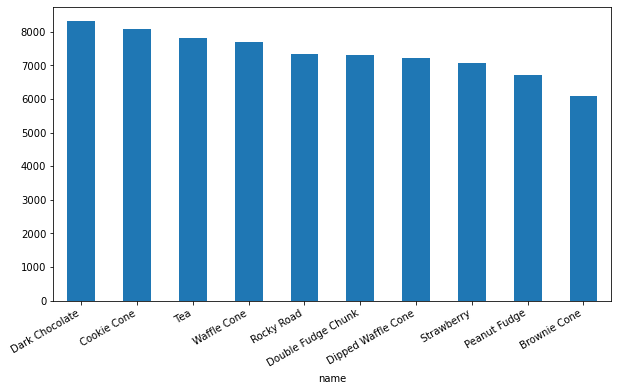

In [255]:
## Visual analysis of dataset ##
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()